## EXERCICES : STATISTIQUE INFERENTIELLE

### PENSER DE MANIERE PROBABILISTE

## Objectif

- Dans le premier exercice, l'objectif est de construire un graphique de la fonction de répartition d'une variable.
- Le second exercice est un problème de simulation dans le but d'estimer une probabilité.

nous répondons aux différentes questions en écrivant les codes adéquats et en faisant des commentaires lorsque cela est nécessaire.

## Importation des librairies

In [43]:
from warnings import filterwarnings
filterwarnings('ignore')  # code optionnel

In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
plt.style.use('ggplot')  # le style ggplot est un paquege de R pour affiné les graphique

## Exercice 1

L'ensemble des données à utiliser pour cet exercice est un tableau d'échantillons donnant des mesures (le poids en grammes, la longueur en centimètres, le rapport en pourcentage de la hauteur à la longueur, etc.) de 7 espèces de poissons codées de 1 à 7. Chaque ligne représente un poisson individuel. Ces données proviennent de Journal of Statistics Education https://jse.amstat.org/datasets/fishcatch.dat.txt.

Consultez la description de ces données que vous pouvez télécharger via cette page https://jse.amstat.org/datasets/fishcatch.txt.

In [45]:
# Importation des données

url = "http://jse.amstat.org/datasets/fishcatch.dat.txt"

# les colonnes ne sont pas directement defini sur le jeu de données. les colonnes n'ont pas d'entete

columns = ['Species','Weight', 'Length1','Length2','Length3','Height%','Width%','Sex']

fishes = pd.read_csv(url, delimiter='\s+', header=None, names = columns)  # header=None pour specifier du'il n'y a
                                                                            # d'entete

fishes

,Species,Weight,Length1,Length2,Length3,Height%,Width%,Sex
1,1,242.0,23.2,25.4,30.0,38.4,13.4,NaN
2,1,290.0,24.0,26.3,31.2,40.0,13.8,NaN
3,1,340.0,23.9,26.5,31.1,39.8,15.1,NaN
4,1,363.0,26.3,29.0,33.5,38.0,13.3,NaN
5,1,430.0,26.5,29.0,34.0,36.6,15.1,NaN
...,...,...,...,...,...,...,...,...
155,7,1100.0,39.0,42.0,44.6,28.7,15.4,0.0
156,7,1000.0,39.8,43.0,45.2,26.4,16.1,0.0
157,7,1100.0,40.1,43.0,45.5,27.5,16.3,0.0
158,7,1000.0,40.2,43.5,46.0,27.4,17.7,1.0


In [46]:
fishes.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 159 entries, 1 to 159
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Species  159 non-null    int64  
 1   Weight   158 non-null    float64
 2   Length1  159 non-null    float64
 3   Length2  159 non-null    float64
 4   Length3  159 non-null    float64
 5   Height%  159 non-null    float64
 6   Width%   159 non-null    float64
 7   Sex      72 non-null     float64
dtypes: float64(7), int64(1)
memory usage: 11.2 KB


In [47]:
fishes['Species'].value_counts(normalize=True)

7    0.352201
1    0.220126
3    0.125786
6    0.106918
5    0.088050
4    0.069182
2    0.037736
Name: Species, dtype: float64

Nous devons analyser le poids des especes 1 et 3 et 7. pour ce faire on vous demande de tracer dans un meme graphique, la fonction de repartition empirique du poids de chacune des 3 especes. 
Que pouvons-nous en conclure sur la distribution ?

In [48]:
# Fonction de calcul de la repartion empirique d'une variable. # Fre = fonction de repartition empirique
def fre(data):           
    
    # Axes des abscisses
    x = np.sort(data)
    
    # Axes des ordonnées
    y = np.arange(1, len(x) + 1) / len(x)
    
    return x, y

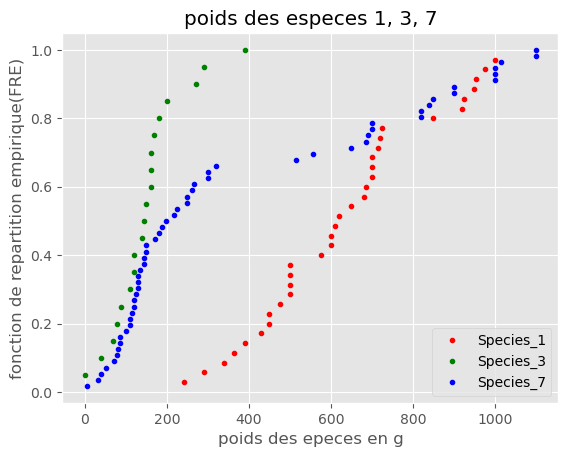

In [49]:
x_1, y_1 = fre(fishes[fishes['Species'] == 1]['Weight'])
x_3, y_3 = fre(fishes[fishes['Species'] == 3]['Weight'])
x_7, y_7 = fre(fishes[fishes['Species'] == 7]['Weight'])

plt.plot(x_1, y_1, color='red', marker = '.', linestyle = 'none')    # marker = '.', linestyle = 'none'   (code optionnel)
plt.plot(x_3, y_3, color='green', marker = '.', linestyle = 'none')
plt.plot(x_7, y_7, color='blue', marker = '.', linestyle = 'none')
plt.legend(('Species_1', 'Species_3', 'Species_7')) # le plt.legend() prend un seul element dans un tuple. 
plt.xlabel('poids des epeces en g')                      # donc il faut doublé le tuple
plt.ylabel('fonction de repartition empirique(FRE)')
plt.title('poids des especes 1, 3, 7')

plt.show()

A present nous devons tracer la proportion de densité de probabilité de chaque especes de verifier si elle suit une loi normal

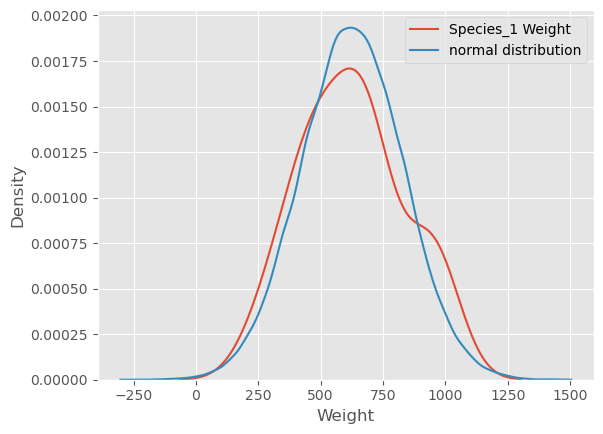

In [50]:
# Densité de probabilité du poids des poissons de l'especes 1 suit-elle une loi normal ?
 # # nous allons verifier si la largeur d'Iris sepales Virginica que nous avons eu precedement suit une loi normal


mean = np.mean(fishes[fishes['Species'] == 1]['Weight'])    # moyenne

std = np.std(fishes[fishes['Species'] == 1]['Weight'])      # Ecart-type

samples_normal = np.random.normal(mean, std, size=100000)       # Distribution normal

sns.distplot(fishes[fishes['Species'] == 1]['Weight'], hist=False, label='Species_1 Weight')

sns.distplot(samples_normal, hist=False, label='normal distribution')   # label c'est la legende

plt.legend()

plt.show()

les deux courbes ne sont pas parfaitement superposer. le poids de l'espece 1 ne suis pas une loi normal. mais elle n'est pas non plus tres dissymétrie

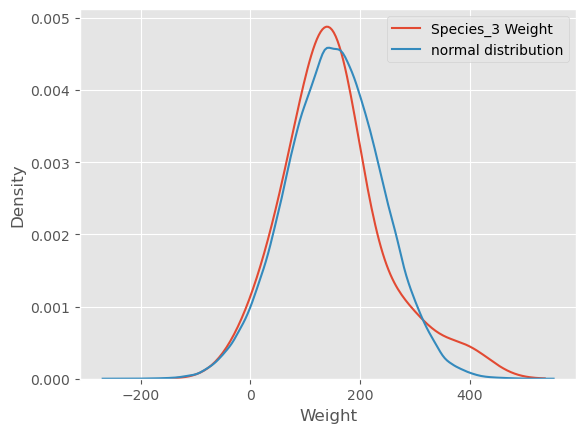

In [51]:
# Densité de probabilité du poids des poissons de l'especes 3 suit-elle une loi normal ?
 # # nous allons verifier si la largeur d'Iris sepales Virginica que nous avons eu precedement suit une loi normal
    
mean = np.mean(fishes[fishes['Species'] == 3]['Weight'])    # moyenne

std = np.std(fishes[fishes['Species'] == 3]['Weight'])      # Ecart-type

samples_normal = np.random.normal(mean, std, size=100000)       # Distribution normal

sns.distplot(fishes[fishes['Species'] == 3]['Weight'], hist=False, label='Species_3 Weight')

sns.distplot(samples_normal, hist=False, label='normal distribution')   # label c'est la legende

plt.legend()

plt.show()    

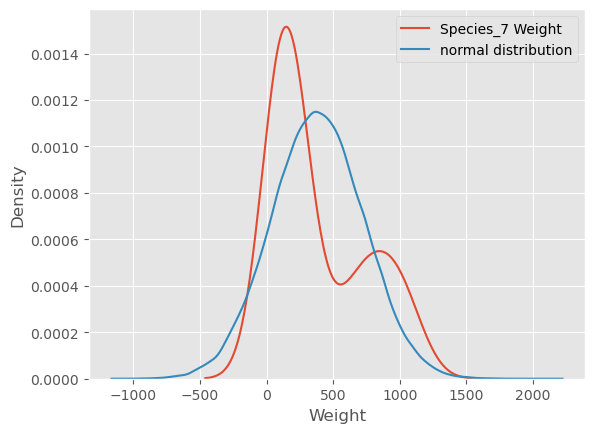

In [52]:
# Densité de probabilité du poids des poissons de l'especes 7 suit-elle une loi normal ?
 # # nous allons verifier si la largeur d'Iris sepales Virginica que nous avons eu precedement suit une loi normal
    
mean = np.mean(fishes[fishes['Species'] == 7]['Weight'])    # moyenne

std = np.std(fishes[fishes['Species'] == 7]['Weight'])      # Ecart-type

samples_normal = np.random.normal(mean, std, size=100000)       # Distribution normal

sns.distplot(fishes[fishes['Species'] == 7]['Weight'], hist=False, label='Species_7 Weight')

sns.distplot(samples_normal, hist=False, label='normal distribution')   # label c'est la legende

plt.legend()

plt.show()    

Nous pouvons conclure que le poids de l'espece 7 ne suis pas une loi normal par rapport au deux autre especes 1 et 3

## EXERCICE 2

On dispose d'une urne contenant 07 boules blanches et 6 boules noires. On tire successivement et sans remises 04 boules et on considère comme succès l'évènement : "la première et la troisième boule sont blanches et la deuxième et quatrième boule sont noires".

Faites une simulation de 100000 tirages et calculez la probabilité de succès.

In [53]:
# Simulation de tirage de boule dans une urne

# En Python 0=1 ; 1=2; 2=3; 3=4 ainsi de suite. c'est pour cela le 1er tirage prend l'argument [0]

n_success = 0  # Initialisation du nombre de succès

N = 10000   # Nombre de repetition de simulation à realisé

url = ['b','b','b','b','b','b','b','n','n','n','n','n','n']   # b = boules blanches; n = boules noires  

for i in range(N):
    tirage = np.random.choice(url, replace=False, size = 4)
    if ((tirage[0] == 'b' and tirage[2] == 'b') and (tirage[1] == 'n' and tirage[3] == 'n')):                               
            
        n_success = n_success + 1
    
probs_succes = n_success / N

print("la probabilité de succes est estimée à ", probs_succes*100, "%")

la probabilité de succes est estimée à  7.51 %
